K Nearest Neighbour

Kasus:Kelulusan Ideal

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

sensus = {
    'tahun_masuk':[2010, 2008, 2009, 2010, 2012, 2011, 2011, 2009, 2011],
    'tahun_lulus':[2014, 2015, 2014, 2014, 2015, 2015, 2014, 2015, 2015],
    'IPK':[3.52, 3.13, 3.4, 3.5, 2.89, 4, 3.8, 3.29, 3.7]
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tahun_masuk,tahun_lulus,IPK
0,2010,2014,3.52
1,2008,2015,3.13
2,2009,2014,3.40
3,2010,2014,3.50
4,2012,2015,2.89
5,2011,2015,4.00
6,2011,2014,3.80
7,2009,2015,3.29
8,2011,2015,3.70


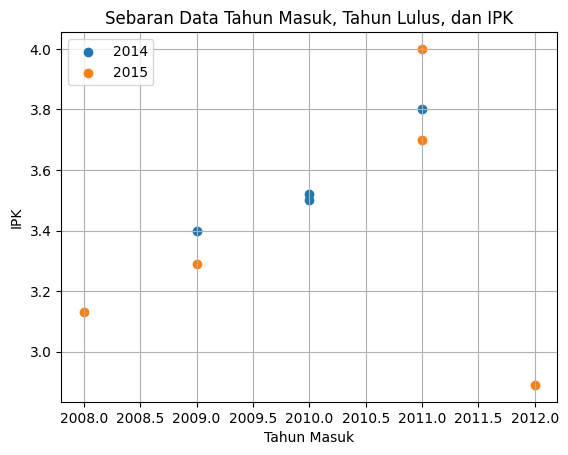

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for thn_lulus, d in sensus_df.groupby('tahun_lulus'):
    ax.scatter(d['tahun_masuk'], d['IPK'], label=thn_lulus)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tahun Masuk, Tahun Lulus, dan IPK')
plt.xlabel('Tahun Masuk')
plt.ylabel('IPK')
plt.grid(True)
plt.show()

In [9]:
import numpy as np

X_train = np.array(sensus_df[['tahun_masuk', 'IPK']])
y_train = np.array(sensus_df['tahun_lulus'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[2010.      3.52]
 [2008.      3.13]
 [2009.      3.4 ]
 [2010.      3.5 ]
 [2012.      2.89]
 [2011.      4.  ]
 [2011.      3.8 ]
 [2009.      3.29]
 [2011.      3.7 ]]

y_train: [2014 2015 2014 2014 2015 2015 2014 2015 2015]


In [10]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]]


In [13]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 1 0 0 1 1 0 1 1]


In [14]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
tahun_masuk = 2009
IPK = 2.57
X_new = np.array([tahun_masuk, IPK]).reshape(1, -1)
X_new

array([[2009.  ,    2.57]])

In [17]:
y_new = model.predict(X_new)
y_new

array([1])

In [18]:
lb.inverse_transform(y_new)

array([2015], dtype=int64)

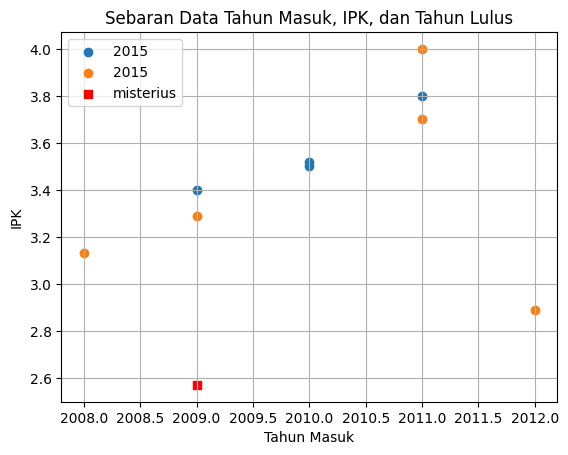

In [19]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('tahun_lulus'):
    ax.scatter(d['tahun_masuk'], d['IPK'], label=thn_lulus)

plt.scatter(tahun_masuk,
            IPK,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tahun Masuk, IPK, dan Tahun Lulus')
plt.xlabel('Tahun Masuk')
plt.ylabel('IPK')
plt.grid(True)
plt.show()

In [20]:
misterius = np.array([tahun_masuk, IPK])
misterius

array([2009.  ,    2.57])

In [21]:
X_train

array([[2010.  ,    3.52],
       [2008.  ,    3.13],
       [2009.  ,    3.4 ],
       [2010.  ,    3.5 ],
       [2012.  ,    2.89],
       [2011.  ,    4.  ],
       [2011.  ,    3.8 ],
       [2009.  ,    3.29],
       [2011.  ,    3.7 ]])

In [22]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[1.3793114224133722,
 1.1461239025515524,
 0.8300000000000001,
 1.3656134152826709,
 3.0170183957012924,
 2.4586378342488753,
 2.3479565583715556,
 0.7200000000000002,
 2.2971504086585193]

In [23]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tahun_masuk,tahun_lulus,IPK,jarak
7,2009,2015,3.29,0.720000
2,2009,2014,3.40,0.830000
1,2008,2015,3.13,1.146124
3,2010,2014,3.50,1.365613
0,2010,2014,3.52,1.379311
8,2011,2015,3.70,2.297150
6,2011,2014,3.80,2.347957
5,2011,2015,4.00,2.458638
4,2012,2015,2.89,3.017018


In [24]:
X_test = np.array([[2009, 3], [2010, 3.3], [2011, 3.9], [2010, 3.4]])
y_test = lb.transform(np.array([2015, 2014, 2014, 2015])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[2009.     3. ]
 [2010.     3.3]
 [2011.     3.9]
 [2010.     3.4]]

y_test:
[1 0 0 1]


In [25]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0])

In [26]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.5


In [27]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

Precission: 0.5


In [28]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 0.5


In [29]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 0.5


In [30]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



In [31]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.0
